In [1]:
#https://github.com/coding-blocks-archives/machine-learning-online-2018/tree/master/5.%20K-Nearest%20Neighbours


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

In [3]:
mnist = pd.read_csv("train.csv")

In [4]:
mnist.shape

(42000, 785)

In [5]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = mnist.iloc[:, 1:].values
y = mnist['label'].values

In [7]:
X.shape

(42000, 784)

In [8]:
y.shape

(42000,)

## Dividing into train and test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [11]:
X_train.shape

(33600, 784)

In [12]:
y_train.shape

(33600,)

In [13]:
X_test.shape

(8400, 784)

In [14]:
y_test.shape

(8400,)

### Function to plot image 

In [15]:
def plot_image(img):
    plt.imshow(img.reshape(28, 28), cmap="gray")
    plt.show()

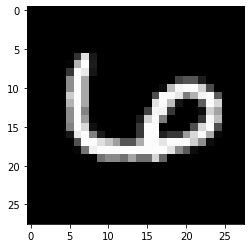

In [16]:
plot_image(X_train[19])

# Mnist using kNN

In [17]:
def distance(pA, pB):
    return np.sum((pA - pB)**2)**0.5

In [18]:
def kNN(X, y, x_query, k=5):
    """
    X -> (100, 2)
    y -> (100, 1)
    x_query -> (1,2)
    k -> scalar
    """
    
    m = X.shape[0]
    distances = []
    
    for i in range(m):
        dis = distance(x_query, X[i])
        distances.append((dis, y[i]))
    
    distances = sorted(distances)
    distances = distances[:k]
    
    distances = np.array(distances)
    labels = distances[:,1]
    
    uniq_label, counts = np.unique(labels, return_counts=True)    
    pred = uniq_label[counts.argmax()]
    
    return int(pred)

In [19]:
kNN(X_train, y_train, X_test[234], k=7)

4

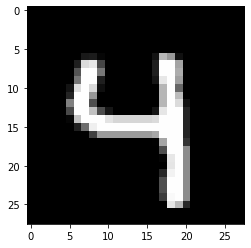

In [20]:
plot_image(X_test[234])

## Predictions

In [21]:
predictions = []
for i in range(100):
    temp = kNN(X_train, y_train, X_test[i], k=9)
    predictions.append(temp)

In [22]:
predictions = np.array(predictions)

## Accuracy

In [23]:
(y_test[:100] == predictions).sum()/len(predictions)

0.99